In [2]:
!wget http://nlp.stanford.edu/data/glove.6B.zip #download the GloVe resources

--2025-03-08 19:23:46--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2025-03-08 19:23:46--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2025-03-08 19:23:46--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glov

In [3]:
!unzip glove.6B.zip #extract the GloVe package

Archive:  glove.6B.zip
  inflating: glove.6B.50d.txt        
  inflating: glove.6B.100d.txt       
  inflating: glove.6B.200d.txt       
  inflating: glove.6B.300d.txt       


In [4]:
!pip install nltk  # ensure that the nltk library is installed
import nltk
nltk.download('punkt_tab')  # download the punkt_tab resource

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

original data size: (20632, 4)
original sentiment distribution:
sentiment
 0    10081
 1     7830
-1     2201
 2      382
-2      138
Name: count, dtype: int64

Sentiment distribution after mapping:
sentiment
2    10081
3     7830
1     2201
4      382
0      138
Name: count, dtype: int64

=== Training set distribution ===
sentiment
2    8064
3    6264
1    1761
4     306
0     110
Name: count, dtype: int64

=== Test set distribution ===
sentiment
2    2017
3    1566
1     440
4      76
0      28
Name: count, dtype: int64

=== training set distribution after upsampling ===
label
3    8064
0    8064
2    8064
4    8064
1    8064
Name: count, dtype: int64

=== Results from the Multinomial Naive Bayes model ===
                  precision    recall  f1-score   support

STRONGLYNEGATIVE       0.06      0.21      0.10        28
  WEAKLYNEGATIVE       0.32      0.52      0.39       440
         NEUTRAL       0.69      0.45      0.54      2017
  WEAKLYPOSITIVE       0.57      0.58      0.58  

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(



=== Results from the Logistic Regression model ===
                  precision    recall  f1-score   support

STRONGLYNEGATIVE       0.17      0.14      0.16        28
  WEAKLYNEGATIVE       0.34      0.55      0.42       440
         NEUTRAL       0.68      0.58      0.63      2017
  WEAKLYPOSITIVE       0.63      0.61      0.62      1566
STRONGLYPOSITIVE       0.18      0.45      0.26        76

        accuracy                           0.58      4127
       macro avg       0.40      0.46      0.42      4127
    weighted avg       0.62      0.58      0.59      4127

Logistic Regression accuracy: 0.5808


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/10
1260/1260 ━━━━━━━━━━━━━━━━━━━━ 831s 656ms/step - accuracy: 0.6252 - loss: 0.9308 - val_accuracy: 0.6273 - val_loss: 1.0009 - learning_rate: 0.0010
Epoch 2/10
1260/1260 ━━━━━━━━━━━━━━━━━━━━ 815s 619ms/step - accuracy: 0.8788 - loss: 0.3024 - val_accuracy: 0.5900 - val_loss: 1.3139 - learning_rate: 0.0010
Epoch 3/10
1260/1260 ━━━━━━━━━━━━━━━━━━━━ 0s 604ms/step - accuracy: 0.9350 - loss: 0.1731
Epoch 3: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
1260/1260 ━━━━━━━━━━━━━━━━━━━━ 777s 617ms/step - accuracy: 0.9350 - loss: 0.1731 - val_accuracy: 0.6198 - val_loss: 1.4569 - learning_rate: 0.0010
Epoch 4/10
1260/1260 ━━━━━━━━━━━━━━━━━━━━ 809s 623ms/step - accuracy: 0.9738 - loss: 0.0797 - val_accuracy: 0.6138 - val_loss: 1.6496 - learning_rate: 2.0000e-04
Epoch 5/10
1260/1260 ━━━━━━━━━━━━━━━━━━━━ 0s 605ms/step - accuracy: 0.9880 - loss: 0.0365
Epoch 5: ReduceLROnPlateau reducing learning rate to 0.0001.
1260/1260 ━━━━━━━━━━━━━━━━━━━━ 796s 618ms/step - accuracy

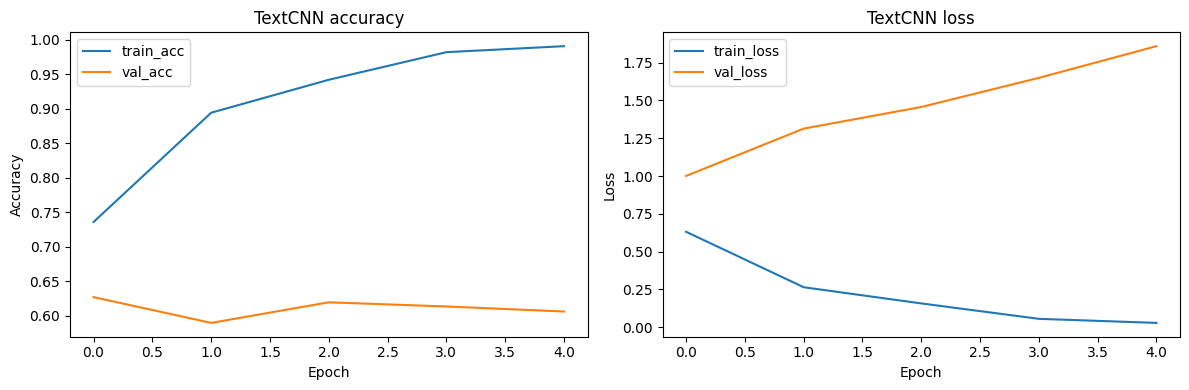

In [5]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import re
import nltk
from nltk.corpus import stopwords
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import (
    Embedding, Conv1D, GlobalMaxPooling1D, Dense,
    Dropout, SpatialDropout1D, BatchNormalization,
    Input, Concatenate
)
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB, ComplementNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam

import string
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from sklearn.utils import resample

nltk.download('stopwords', quiet=True)
nltk.download('wordnet', quiet=True)
nltk.download('punkt', quiet=True)

# to ensure the reproducibility of experimental results, fix the random seed
np.random.seed(42)
tf.random.set_seed(42)

# 1. load the dataset
file_path = "/content/SemEval2017-task4-dev.subtask-CE.english.INPUT.txt"
df = pd.read_csv(file_path, sep="\t", header=None, names=["id", "topic", "sentiment", "tweet"])

print("original data size:", df.shape)
print("original sentiment distribution:")
print(df["sentiment"].value_counts())

# 2. data cleaning
stop_words = set(stopwords.words("english")) #load English stop words
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    text = text.lower() #convert all text to lowercase
    text = re.sub(r':\)', ' happyface ', text)
    text = re.sub(r':\(', ' sadface ', text)
    text = re.sub(r'!+', ' exclamation ', text)
    text = re.sub(r'\?+', ' question ', text)
    text = re.sub(r"http\S+|www\S+|https\S+", " urllink ", text)
    text = re.sub(r"@\w+", " mention ", text)
    text = re.sub(r"#(\w+)", r" hashtag ", text)
    text = re.sub(r"[^\w\s]", "", text)
    tokens = word_tokenize(text)
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return " ".join(tokens)

df["tweet"] = df["tweet"].astype(str).apply(clean_text)

# because the dataset contains five values (-2, -1, 0, 1, and 2),
# we map them to the range 0–4 to prevent the loss of negative labels
label_map = {
    -2: 0,  # STRONGLYNEGATIVE
    -1: 1,  # WEAKLYNEGATIVE
     0: 2,  # NEUTRAL
     1: 3,  # WEAKLYPOSITIVE
     2: 4   # STRONGLYPOSITIVE
}
df = df[df["sentiment"].isin(label_map.keys())]  # retain only the values -2, -1, 0, 1, and 2
df["sentiment"] = df["sentiment"].map(label_map)

print("\nSentiment distribution after mapping:")
print(df["sentiment"].value_counts())

# including the topic as part of the input by concatenating it with the tweet
#  df["tweet"] = df["topic"].astype(str) + " " + df["tweet"]

X = df["tweet"]
y = df["sentiment"]

# 3. Split the dataset using stratified sampling
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
) #the test set size accounts for 20%

print("\n=== Training set distribution ===")
print(pd.Series(y_train).value_counts())
print("\n=== Test set distribution ===")
print(pd.Series(y_test).value_counts())

#  upsampling
train_data = pd.DataFrame({"text": X_train, "label": y_train})
counts = train_data["label"].value_counts()
min_count = counts.min()
max_count = counts.max()
dfs = []
for lbl in train_data["label"].unique():
    subset = train_data[train_data["label"] == lbl]
    # upsample to match the size of the majority class
    subset_upsampled = resample(subset, replace=True, n_samples=max_count, random_state=42)
    dfs.append(subset_upsampled)

train_data_balanced = pd.concat(dfs).sample(frac=1, random_state=42).reset_index(drop=True)
X_train = train_data_balanced["text"]
y_train = train_data_balanced["label"]

print("\n=== training set distribution after upsampling ===")
print(y_train.value_counts())

# 4. MultinomialNB
tfidf = TfidfVectorizer(stop_words="english", max_features=10000)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)
#convert the text into TF-IDF features

nb_model = MultinomialNB()
nb_model.fit(X_train_tfidf, y_train)
y_pred_nb = nb_model.predict(X_test_tfidf)

print("\n=== Results from the Multinomial Naive Bayes model ===")
print(classification_report(
    y_test, y_pred_nb,
    labels=[0,1,2,3,4],
    target_names=[
        "STRONGLYNEGATIVE",  # 0
        "WEAKLYNEGATIVE",    # 1
        "NEUTRAL",           # 2
        "WEAKLYPOSITIVE",    # 3
        "STRONGLYPOSITIVE"   # 4
    ]
))
acc_nb = accuracy_score(y_test, y_pred_nb)
print(f"MultinomialNB accuracy: {acc_nb:.4f}")

# 5. LogisticRegression
lr_model = LogisticRegression(
    multi_class='multinomial', #use softmax for the multi-class classification task
    solver='lbfgs',
    C=1.0,
    max_iter=1000,
    random_state=42
)
lr_model.fit(X_train_tfidf, y_train)
y_pred_lr = lr_model.predict(X_test_tfidf)

print("\n=== Results from the Logistic Regression model ===")
print(classification_report(
    y_test, y_pred_lr,
    labels=[0,1,2,3,4],
    target_names=[
        "STRONGLYNEGATIVE",
        "WEAKLYNEGATIVE",
        "NEUTRAL",
        "WEAKLYPOSITIVE",
        "STRONGLYPOSITIVE"
    ]
))
acc_lr = accuracy_score(y_test, y_pred_lr)
print(f"Logistic Regression accuracy: {acc_lr:.4f}")

# 6. improved TextCNN (with parallel multi-kernel convolutions)
max_words = 20000
max_len = 100
embedding_dim = 300

tokenizer = Tokenizer(num_words=max_words, oov_token="<OOV>")
tokenizer.fit_on_texts(X_train)
X_train_seq = pad_sequences(tokenizer.texts_to_sequences(X_train), maxlen=max_len)
X_test_seq = pad_sequences(tokenizer.texts_to_sequences(X_test), maxlen=max_len)

# load pre-trained GloVe.
embedding_index = {}
glove_file_path = "/content/glove.6B.300d.txt"
try:
    with open(glove_file_path, encoding='utf-8') as f:
        for line in f:
            values = line.split()
            word = values[0]
            coefs = np.asarray(values[1:], dtype="float32")
            embedding_index[word] = coefs
except FileNotFoundError:
    print("If GloVe embeddings are not found, random initialization will be used.")

word_index = tokenizer.word_index
embedding_matrix = np.zeros((max_words, embedding_dim))
for word, i in word_index.items():
    if i < max_words:
        embedding_vector = embedding_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector
        else:
            embedding_matrix[i] = np.random.normal(0, 0.1, embedding_dim)

input_layer = Input(shape=(max_len,), name="input_layer")
embedding_layer = Embedding(
    input_dim=max_words, #vocabulary size is 20,000
    output_dim=embedding_dim, #output the word embedding dimensions
    weights=[embedding_matrix], #use the GloVe initialization matrix we prepared in the previous step
    input_length=max_len, #specify the sequence length
    trainable=True, #enable fine-tuning during training
    name="embedding_layer"
)(input_layer)

x = SpatialDropout1D(0.2)(embedding_layer) #randomly deactivate entire rows of some word embeddings along the embedding
#dimension to prevent overfitting

conv_3 = Conv1D(256, 3, padding='same', activation='relu')(x) #convolutional kernel size: 3
bn_3 = BatchNormalization()(conv_3) ##global max pooling
pool_3 = GlobalMaxPooling1D()(bn_3)

conv_5 = Conv1D(256, 5, padding='same', activation='relu')(x) #convolutional kernel size: 5
bn_5 = BatchNormalization()(conv_5)
pool_5 = GlobalMaxPooling1D()(bn_5)

conv_7 = Conv1D(256, 7, padding='same', activation='relu')(x) #convolutional kernel size: 7
bn_7 = BatchNormalization()(conv_7)
pool_7 = GlobalMaxPooling1D()(bn_7)

merged = Concatenate()([pool_3, pool_5, pool_7]) #concatenate the outputs of the three branches
fc1 = Dense(512, activation='relu')(merged)
fc1 = BatchNormalization()(fc1)
fc1 = Dropout(0.5)(fc1)

fc2 = Dense(256, activation='relu')(fc1)
fc2 = Dropout(0.3)(fc2)

output_layer = Dense(5, activation='softmax')(fc2)
cnn_model = Model(inputs=input_layer, outputs=output_layer, name="Improved_TextCNN")

optimizer = Adam(learning_rate=0.001) #use the Adam optimizer with an initial learning rate of 0.001
cnn_model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer=optimizer,
    metrics=["accuracy"]
)

#if the validation loss does not improve for 2 epochs,
#reduce the learning rate by a factor of 0.2 until it reaches a minimum of min_lr=0.0001
reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2,
    patience=2,
    min_lr=0.0001,
    verbose=1
)

#if the validation loss does not improve for 4 epochs,
#stop training early and restore the best weights (to prevent overfitting)
early_stopping = EarlyStopping(
    monitor="val_loss",
    patience=4,
    restore_best_weights=True,
    verbose=1
)

#train for 10 epochs with a batch size of 32
history = cnn_model.fit(
    X_train_seq, y_train,
    epochs=10,
    batch_size=32,
    validation_data=(X_test_seq, y_test),
    callbacks=[early_stopping, reduce_lr]
)

y_pred_cnn = np.argmax(cnn_model.predict(X_test_seq), axis=1)

print("\n=== Results from the TextCNN model ===")
print(classification_report(
    y_test, y_pred_cnn,
    labels=[0,1,2,3,4],
    target_names=[
        "STRONGLYNEGATIVE",
        "WEAKLYNEGATIVE",
        "NEUTRAL",
        "WEAKLYPOSITIVE",
        "STRONGLYPOSITIVE"
    ]
))
acc_cnn = accuracy_score(y_test, y_pred_cnn)
print(f"TextCNN accuracy: {acc_cnn:.4f}")

# 7. compare the accuracies of the three models
print("\n=== Comparison of model accuracies ===")
print(f"MultinomialNB:      {acc_nb:.4f}")
print(f"LogisticRegression: {acc_lr:.4f}")
print(f"TextCNN:            {acc_cnn:.4f}")

# visualization
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='train_acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.title('TextCNN accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('TextCNN loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()
plt.show()

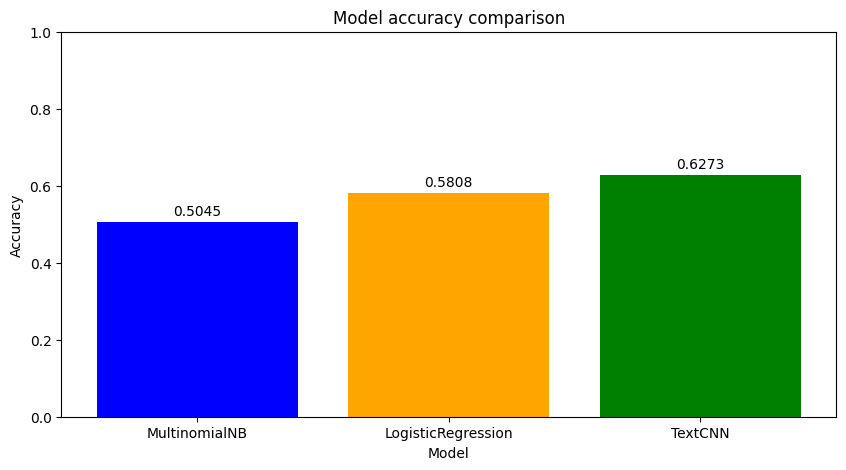

In [7]:
# generate a comparison plot
plt.figure(figsize=(10, 5))
bars = plt.bar(["MultinomialNB", "LogisticRegression", "TextCNN"],
               [acc_nb, acc_lr, acc_cnn],
               color=["blue", "orange", "green"])

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.01,
             f'{height:.4f}', ha='center', va='bottom')

plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.title("Model accuracy comparison")
plt.ylim(0, 1.0)
plt.show()

In [9]:
!pip install wordcloud # install the `wordcloud` library
from wordcloud import WordCloud # import the `WordCloud` class

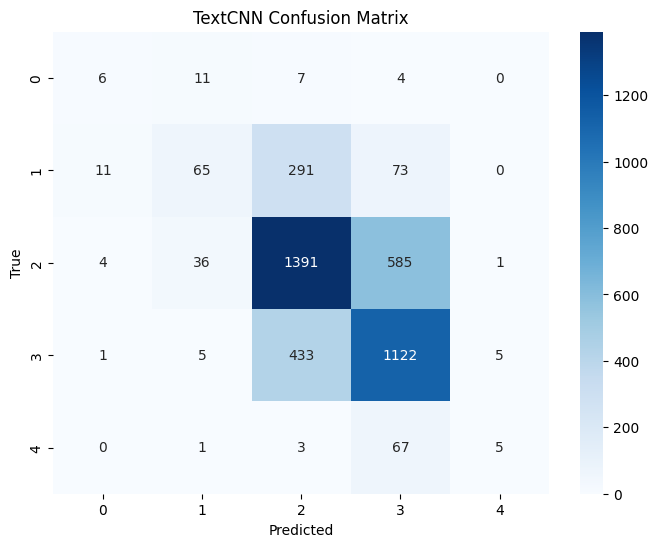

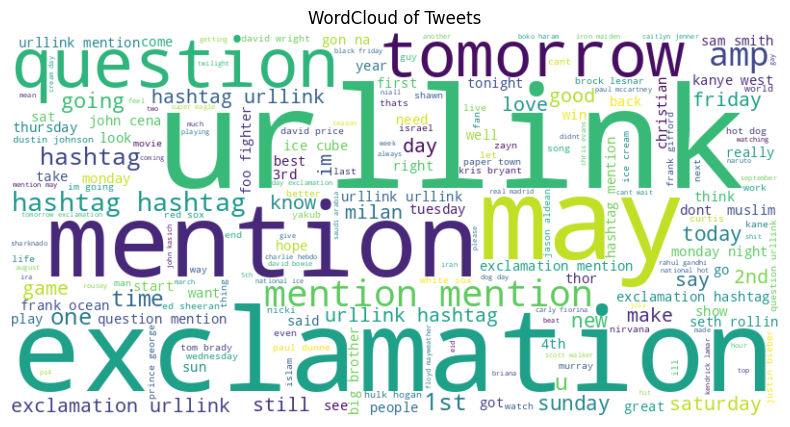

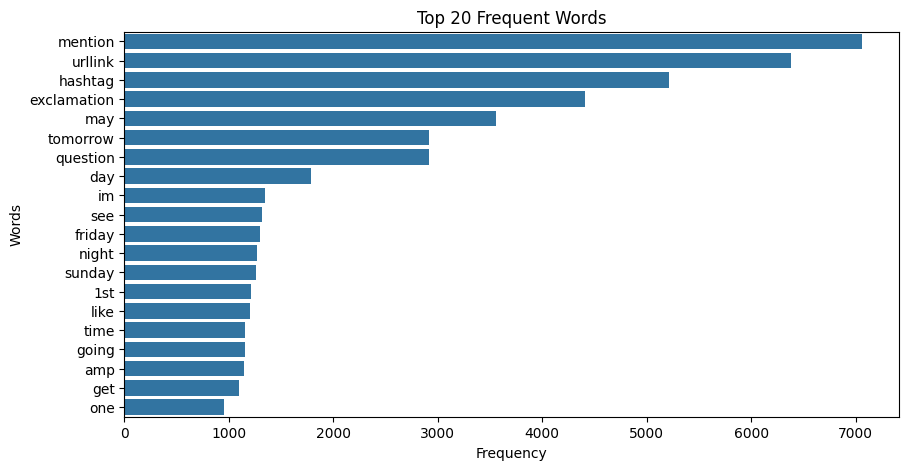

In [10]:
!pip install seaborn # install the seaborn library to use heatmaps
import seaborn as sns # import the seaborn library
from sklearn.metrics import confusion_matrix # import `confusion_matrix` from `sklearn.metrics`

# 1. plot a heatmap of the confusion matrix
cm = confusion_matrix(y_test, y_pred_cnn)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
plt.title("TextCNN Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# 2. generate a word cloud
#   concatenate all tweets into a single long string
text_data = " ".join(df['tweet'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_data)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("WordCloud of Tweets")
plt.show()

# 3. visualize the high-frequency words using a bar chart
tokenized_words = word_tokenize(text_data)
freq_dist = nltk.FreqDist(tokenized_words)
most_common_words = freq_dist.most_common(20)  # select the top 20 high-frequency words

words = [word for word, count in most_common_words]
counts = [count for word, count in most_common_words]

plt.figure(figsize=(10, 5))
sns.barplot(x=counts, y=words)
plt.title("Top 20 Frequent Words")
plt.xlabel("Frequency")
plt.ylabel("Words")
plt.show()